<a href="https://colab.research.google.com/github/AbhayNath001/AbhayNath001/blob/main/map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/marceloprates/prettymaps/blob/master/notebooks/examples.ipynb)

# Installation (Restart runtime after running the following cell)

In [1]:
#!pip install vpype
#!pip install git+https://github.com/abey79/vsketch#egg=vsketch
!pip install git+https://github.com/abey79/vsketch.git
!pip install git+https://github.com/marceloprates/prettymaps.git
!pip install matplotlib --version=3.1.3

!mkdir ../prints
!mkdir ../assets
!mkdir ../assets/Permanent_Marker/
!wget -O ../assets/Permanent_Marker/PermanentMarker-Regular.ttf https://github.com/marceloprates/prettymaps/raw/main/assets/Permanent_Marker/PermanentMarker-Regular.ttf

  Cloning https://github.com/abey79/vsketch.git to /tmp/pip-req-build-ux7v06cl
  Running command git clone --filter=blob:none --quiet https://github.com/abey79/vsketch.git /tmp/pip-req-build-ux7v06cl
  Resolved https://github.com/abey79/vsketch.git to commit 9c1f6ea0b129423b634f045bfeb5b3eaa8e99457
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/marceloprates/prettymaps.git to /tmp/pip-req-build-b8sbvum3
  Running command git clone --filter=blob:none --quiet https://github.com/marceloprates/prettymaps.git /tmp/pip-req-build-b8sbvum3
  Resolved https://github.com/marceloprates/prettymaps.git to commit dc90176911035d8e35a0c1e050d7cf87047358e8
  Preparing metadata (setup.py) ... done

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] 

# Imports

In [19]:
!pip install descartes
!pip install plot==0.6.5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# For local execution (does not require installing the library):
%load_ext autoreload
%autoreload 2
import sys; sys.path.append('../')

# Prettymaps
from prettymaps import *
# Vsketch
try:
  import vsketch
except:
  print("Vsketch import failed")
# OSMNX
import osmnx as ox
# Matplotlib-related
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
from descartes import PolygonPatch
# Shapely
from shapely.geometry import *
from shapely.affinity import *
from shapely.ops import unary_union

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Circle Plot

/usr/local/lib/python3.10/dist-packages/osmnx/geometries.py:358: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf["geometry"] = np.nan
/usr/local/lib/python3.10/dist-packages/osmnx/geometries.py:358: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geom

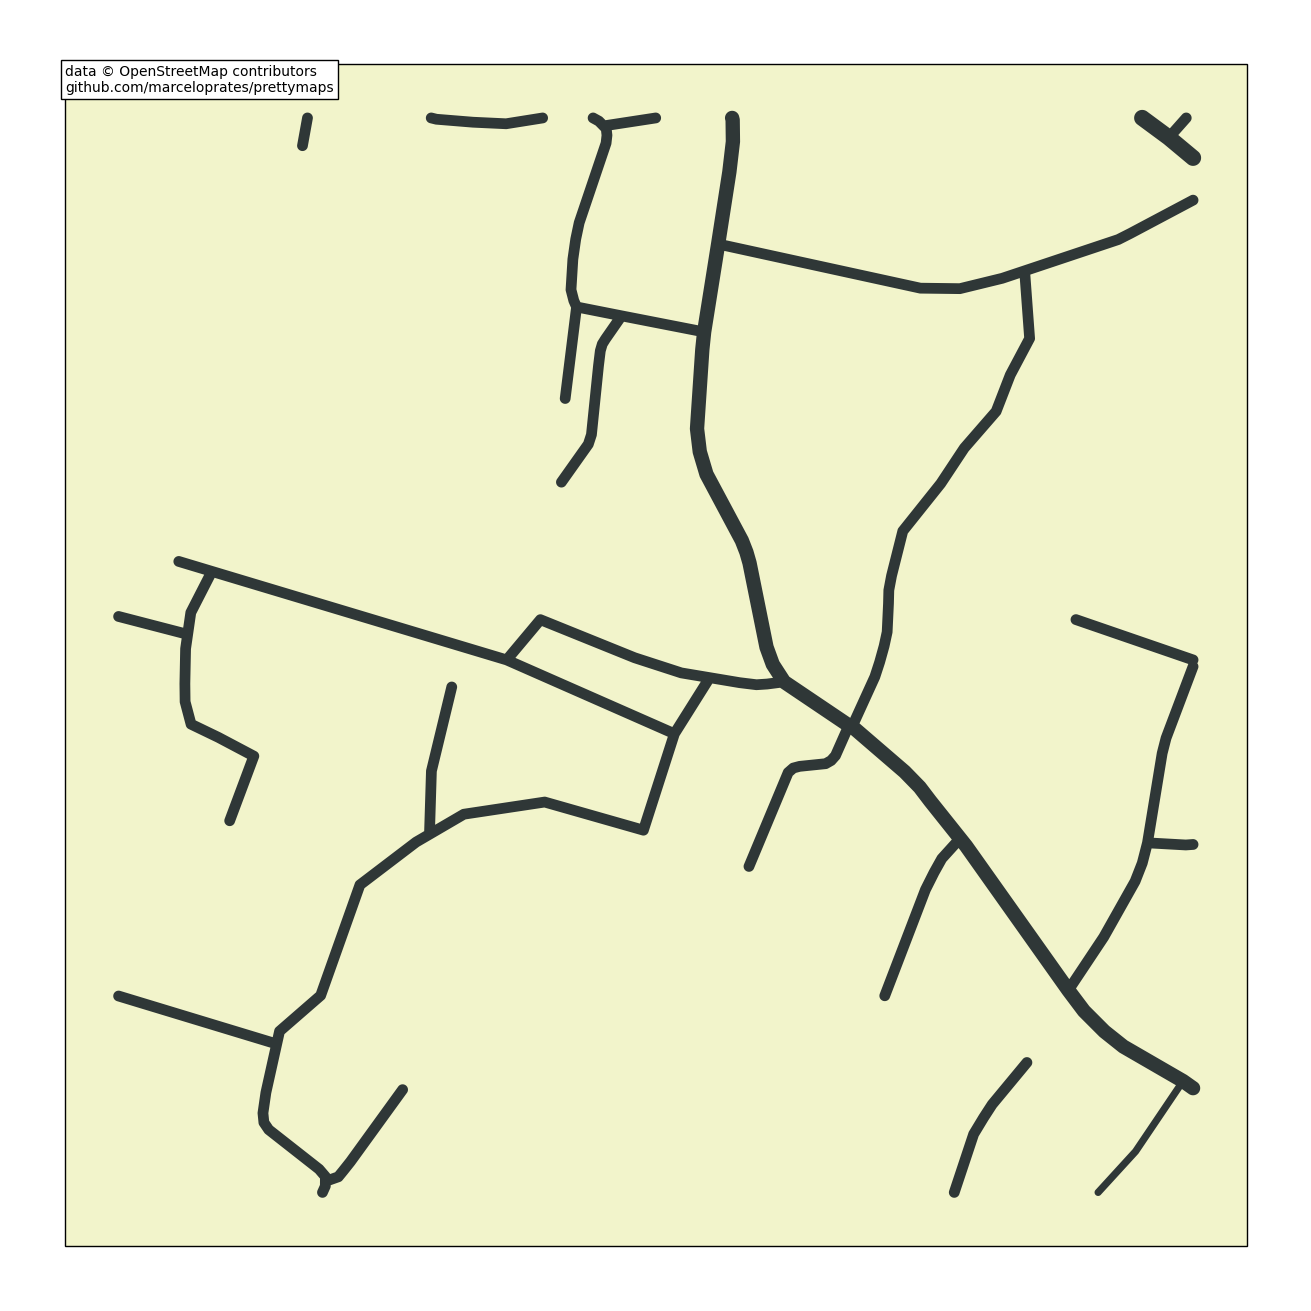

In [29]:
# Figure width and height
fig, ax = plt.subplots(figsize = (13, 13), constrained_layout = True)

layers = plot(
    # Coordinates or location name
    (22.663483789365603, 88.85269276937821), radius = 300,
    ax = ax,
    layers = {
            'perimeter': {},
            'streets': {
                'circle': False,
                'custom_filter': '["highway"~"motorway|trunk|primary|secondary|tertiary|residential|service|unclassified|pedestrian|footway"]',
                'width': {
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'residential': 3,
                    'service': 2,
                    'unclassified': 2,
                    'pedestrian': 2,
                    'footway': 1,
                }
            },
            'building': {'circle': False,'tags': {'building': True, 'landuse': 'construction'}, 'union': True},
            'water': {'circle': False,'tags': {'natural': ['water', 'bay']}},
            'green': {'circle': False,'tags': {'landuse': 'grass', 'natural': ['island', 'wood'], 'leisure': 'park'}},
            'forest': {'circle': False,'tags': {'landuse': 'forest'}},
            'parking': {'circle': False,'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}}
        },
#        drawing_kwargs = {
#            'background': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'hatch': 'ooo...', 'zorder': -1},
#            'perimeter': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'lw': 0, 'hatch': 'ooo...',  'zorder': 0},
#            'green': {'fc': '#D0F1BF', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
#            'forest': {'fc': '#64B96A', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
#            'water': {'fc': '#a1e3ff', 'ec': '#2F3737', 'hatch': 'ooo...', 'hatch_c': '#85c9e6', 'lw': 1, 'zorder': 2},
#            'parking': {'fc': '#F2F4CB', 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
#            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 3},
#            'building': {'palette': ['#FFC857', '#E9724C', '#C5283D'], 'ec': '#2F3737', 'lw': .5, 'zorder': 4},
#        },

#        osm_credit = {'color': '#2F3737', 'x': 0.02, 'y' : 0.02 }
)

plt.savefig('../prints/rome.png', dpi = 600)
#plt.savefig('../prints/rome.svg')

# Old Rauma, Finland (boundary defined by geography with postprocessing step)

/usr/local/lib/python3.10/dist-packages/osmnx/geometries.py:358: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf["geometry"] = np.nan
/usr/local/lib/python3.10/dist-packages/osmnx/geometries.py:358: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geom

KeyError: ignored

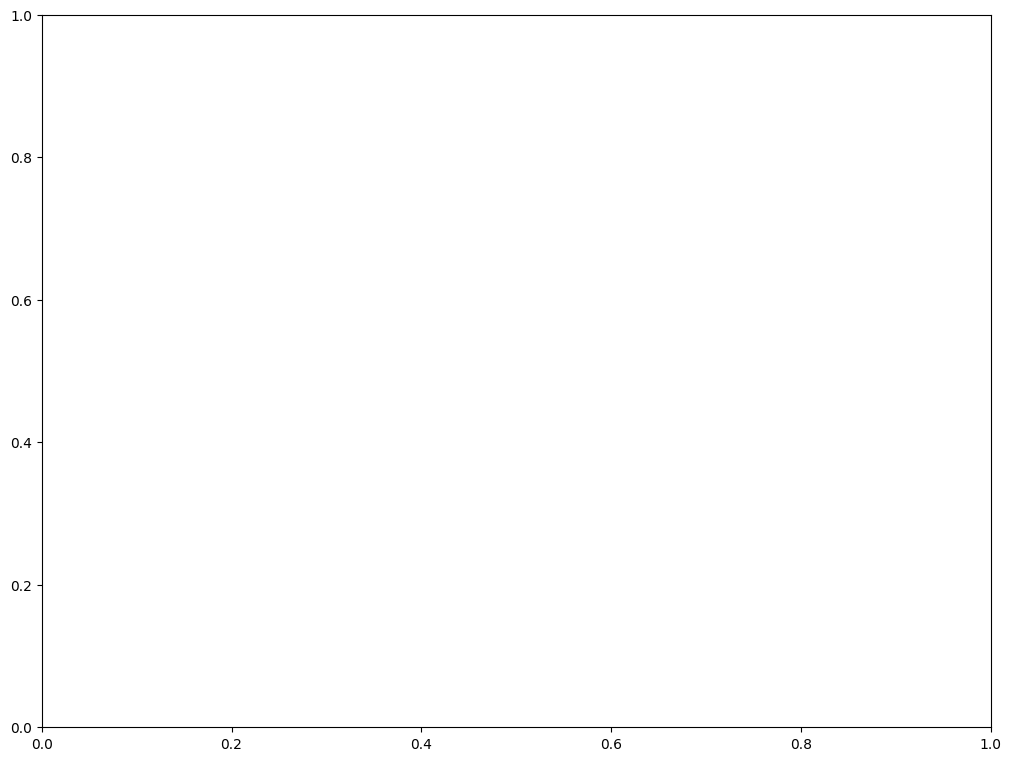

In [31]:
def postprocessing(layers):
    layers['perimeter'] = layers['perimeter'].buffer(10)
    return layers

fig, ax = plt.subplots(figsize = (10, 7.5), constrained_layout = True)

layers = plot(
    'Old Rauma, Rauma',

    rotation = 180,

    ax = ax,

    postprocessing = postprocessing,

    layers = {
            'perimeter': {
                'width': .5
            },
            'streets': {
                'width': {
                    #'motorway': 8,
                    'trunk': 4,
                    'primary': 4,
                    'secondary': 3,
                    'tertiary': 2,
                    'residential': 1,
                    #'living_street': 3,
                    'pedestrian': .5,
                    'footway': .5,
                    #'track': 1,
                    #'bridleway': 1
                }
            },
            'building': {'tags': {'building': True}, 'union': False},
            'water': {'tags': {'natural': ['water', 'bay']}},
            'green': {'tags': {'landuse': 'grass', 'natural': ['island', 'wood'], 'leisure': 'park'}},
        },

)

plt.savefig('../prints/old-rauma.png', dpi=400)
#plt.savefig('../prints/old-rauma.svg')

# Stadsholmen, Sweden (boundary defined by geography with postprocessing step)

In [ ]:
def postprocessing(layers):
    layers['perimeter'] = layers['perimeter'].buffer(20)
    return layers

fig, ax = plt.subplots(figsize = (10, 13), constrained_layout = True)

layers = plot(
    'Stadsholmen, Sweden',

    ax = ax,

    postprocessing = postprocessing,

    layers = {
            'perimeter': {},
            'streets': {
                'width': {
                    #'motorway': 8,
                    'trunk': 6,
                    'primary': 6,
                    'secondary': 5,
                    'tertiary': 4,
                    'residential': 3,
                    #'living_street': 3,
                    'pedestrian': 1.5,
                    'footway': 1.5,
                    #'track': 1,
                    #'bridleway': 1
                }
            },
            'building': {'tags': {'building': True}, 'union': False},
            'water': {'tags': {'natural': ['water', 'bay']}},
            'green': {'tags': {'landuse': 'grass', 'natural': ['island', 'wood'], 'leisure': 'park'}},
        },
        drawing_kwargs = {
            'background': {'fc': '#F7F3F5', 'ec': '#EFE7EB', 'hatch': 'aaa...', 'zorder': -1},
            'perimeter': {'fc': '#F7F3F5', 'ec': '#2F3737', 'lw': 3, 'hatch': 'ooo...', 'hatch_c': '#EFE7EB',  'zorder': 0},
            'green': {'fc': '#AABD8C', 'ec': '#2F3737', 'hatch_c': '#b3cfa5', 'hatch': 'ooo...', 'lw': 0, 'zorder': 1},
            'water': {'fc': '#a1e3ff', 'hatch': 'ooo...', 'hatch_c': '#80bed9', 'lw': 0, 'zorder': 2},
            'streets': {'fc': '#3b4545', 'lw': 0, 'zorder': 3},
            'building': {'palette': ['#433633', '#FF5E5B'], 'ec': '#2F3737', 'hatch_c': '#b3504f', 'lw': 0, 'zorder': 4}, #'hatch': 'ooo...',
        },

      osm_credit = {'x': .25, 'y': -.25, 'color': '#2F3737'}

)

plt.savefig('../prints/stadsholmen.png')
#plt.savefig('../prints/stadsholmen.svg')

# Istanbul, Turkey (multiple adjacent plots)

In [ ]:
fig, ax = plt.subplots(figsize = (10, 12), constrained_layout = True)
fig.patch.set_facecolor('#F9F8F8')

# List adjacent plots
places = {
    'Hocapaşa Mahallesi, Istanbul':['#BA2D0B', '#D5F2E3', '#73BA9B', '#F79D5C'],
    'Sultan Ahmet Mahallesi, Istanbul': ['#49392C', '#77625C', '#B2B1CF', '#E1F2FE', '#98D2EB'],
    'Cankurtaran Mahallesi, Istanbul': ['#433633', '#FF5E5B', '#EEE4E1'],
   # 'Arap Cami Mahallesi, Istanbul': ['#BA2D0B', '#D5F2E3', '#73BA9B', '#F79D5C'],
}

def postprocessing(layers):
    layers['perimeter'] = layers['perimeter'].buffer(20)
    return layers

# Loop through the plots
for i, (place, palette) in enumerate(places.items()):

    plot(
        place,

        ax = ax,

        postprocessing = postprocessing,

        layers = {
            'perimeter': {},
            'streets': {
                'width': {
                    'trunk': 6,
                    'primary': 6,
                    'secondary': 5,
                    'tertiary': 4,
                    'residential': 3.5,
                    'pedestrian': 3,
                    'footway': 3,
                    'path': 3,
                }
            },
            'building': {'tags': {'building': True, 'leisure': ['track', 'pitch']}, 'union': False},
            'water': {'tags': {'natural': ['water', 'bay']}},
            'park': {'tags': {'leisure': 'park'}},
            'forest': {'tags': {'landuse': 'forest'}},
            'garden': {'tags': {'leisure': 'garden'}},
        },
        drawing_kwargs = {
            'perimeter': {'fill': True, 'fc': '#bebe8e', 'ec': '#999999', 'lw': 0, 'zorder': 0},
            'park': {'fc': '#AABD8C', 'ec': '#87996b', 'lw': 1, 'zorder': 1},
            'forest': {'fc': '#78A58D', 'ec': '#658a76', 'lw': 1, 'zorder': 1},
            'garden': {'fc': '#a9d1a9', 'ec': '#8ab58a', 'lw': 1, 'zorder': 1},
            'water': {'fc': '#92D5F2', 'ec': '#6da8c2', 'lw': 1, 'zorder': 2},
            'streets': {'fc': '#F1E6D0', 'ec': '#2F3737', 'lw': 1.5, 'zorder': 3},
            'building': {'palette': palette, 'ec': '#2F3737', 'lw': 1, 'zorder': 4},
        },

        osm_credit = {'x': 0.3, 'y': -.1, 'color': '#2F3737'} if i == 0 else None
    )

ax.autoscale()

plt.savefig('../prints/istanbul.png')
#plt.savefig('../prints/istanbul.svg')